### Notebook summarizing the results of our VaMoS submission


Libraries

In [2]:
# for arrays
import numpy as np

# for dataframes
import pandas as pd

# plots
import matplotlib.pyplot as plt
# high-level plots
import seaborn as sns

# statistics
import scipy.stats as sc
# hierarchical clustering, clusters
from scipy.cluster.hierarchy import linkage, cut_tree, leaves_list
from scipy import stats
# statistical tests
from scipy.stats import mannwhitneyu

# machine learning library
# Principal Component Analysis - determine new axis for representing data
from sklearn.decomposition import PCA
# Random Forests -> vote between decision trees
# Gradient boosting -> instead of a vote, upgrade the same tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
# Decision Tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
# To add interactions in linear regressions models
from sklearn.preprocessing import PolynomialFeatures
# Elasticnet is an hybrid method between ridge and Lasso
from sklearn.linear_model import LinearRegression, ElasticNet
# To separate the data into training and test
from sklearn.model_selection import train_test_split
# Simple clustering (iterative steps)
from sklearn.cluster import KMeans
# get interactions of features
from sklearn.preprocessing import PolynomialFeatures


# we use it to interact with the file system
import os
# compute time
from time import time

# statistics
import scipy.stats as sc
# hierarchical clustering, clusters
from scipy.cluster.hierarchy import linkage, cut_tree, leaves_list
from scipy import stats
# statistical tests
from scipy.stats import mannwhitneyu

# no warning
import warnings
warnings.filterwarnings("ignore")

### Import data

In [3]:
def time_to_sec(el):
    tab = el.split(":")
    return float(tab[0])*60+float(tab[1][:-1])

files = dict()
res =  dict()

file_names = sorted(os.listdir('../data/x264'))
inputs = [f.split("_")[2] for f in file_names]

for i in range(len(inputs)):
    files[inputs[i]] = file_names[i]

softs = ['x264', 'x265']

for soft in softs:
    for inp in inputs:
        df = pd.read_csv("../data/"+soft+"/"+ files[inp])
        df['etime'] = [time_to_sec(k) for k in df["elapsedtime"]]
        for feat in ["elapsedtime"]:#"user", "system", 
            del df[feat]
        res[soft, inp] = df
        
to_keep = ['aq-strength', 'ipratio', 'pbratio', 'qblur', 'psy-rd', 'qcomp', 'vbv-init', 'aq-mode', 'b-adapt',
           'bframes', 'crf', 'keyint', 'lookahead-threads', 'min-keyint', 'qp', 'qpstep', 'qpmin', 
           'qpmax', 'rc-lookahead', 'ref', 'vbv-bufsize', 'scenecut', 'aud', 'constrained-intra', 
           'intra-refresh', 'no-asm', 'slow-firstpass', 'weightb', 'deblock', 'me', 'overscan', 
           'preset', 'tune']

num = ['aq-strength', 'ipratio', 'pbratio', 'qblur', 'qcomp', 'psy-rd', 'qcomp', 'vbv-init', 'aq-mode', 
       'b-adapt', 'bframes', 'crf', 'keyint', 'lookahead-threads', 'min-keyint', 'qp', 'qpstep', 
       'qpmin', 'qpmax', 'rc-lookahead', 'ref', 'vbv-bufsize', 'scenecut']

categ = ['aud', 'constrained-intra', 'intra-refresh', 'no-asm', 'slow-firstpass', 'weightb', 
         'deblock', 'me', 'overscan', 'preset', 'tune']

perfs = ['cpu', 'etime', 'size', 'system', 'fps', 'user'] 

# Data for x264 and the Animation video       
res["x264", "Animation"].head()

,configurationID,aud,constrained-intra,intra-refresh,no-asm,slow-firstpass,weightb,aq-strength,ipratio,pbratio,...,preset,scenecut,tune,size,user,system,cpu,fps,kbs,etime
0,1,None,--constrained-intra,None,None,None,--weightb,0.0,1.0,1.0,...,veryslow,30,ssim,337672,15.19,0.14,531,74.61,198.24,2.8
1,2,--aud,None,None,None,None,--no-weightb,0.0,1.1,1.2,...,fast,0,grain,904268,8.55,0.16,657,171.65,532.03,1.3
2,11,None,--constrained-intra,None,--no-asm,--slow-firstpass,--no-weightb,3.0,1.5,1.4,...,ultrafast,0,ssim,183293,7.47,0.17,400,116.50,106.60,1.9
3,101,--aud,None,None,None,None,--weightb,0.0,1.4,1.2,...,fast,40,grain,587744,3.95,0.09,487,296.68,345.87,0.8
4,1001,None,None,None,--no-asm,--slow-firstpass,--weightb,1.0,1.2,1.4,...,placebo,30,animation,8594537,33.65,0.11,636,40.56,5071.80,5.3


### Compare performances

In [4]:
corrs = dict()

for inp in inputs:
    for p in perfs:
        corrs[inp, p] =  sc.spearmanr(res['x264', inp][p], res['x265', inp][p]).correlation

print("\\begin{table}[htb]")
print("\\caption{Correlations between the performance distributions of x264 and x265 for several input videos}")
print("\\label{tab:corrs}\\vspace*{-0.4cm}")
print("\\begin{tabular}{|c|c|c|c|}")
print("\\hline")
print("Video")
for p in perfs:
    print("& "+p)
print("\\\\ \\hline")
for inp in inputs:
    print(inp)
    for p in perfs:
        print("& "+str(np.round(corrs[inp, p],2)))
    print("\\\\ \\hline")
print("\\end{tabular}")
print("\\end{table}")

\begin{table}[htb]
\caption{Correlations between the performance distributions of x264 and x265 for several input videos}
\label{tab:corrs}\vspace*{-0.4cm}
\begin{tabular}{|c|c|c|c|}
\hline
Video
& cpu
& etime
& size
& system
& fps
& user
\\ \hline
Animation
& 0.05
& 0.74
& 0.98
& 0.16
& -0.09
& 0.79
\\ \hline
CoverSong
& 0.0
& 0.73
& 0.98
& 0.2
& 0.98
& 0.77
\\ \hline
Gaming
& -0.02
& 0.81
& 0.99
& 0.13
& 0.99
& 0.84
\\ \hline
Lecture
& 0.07
& 0.75
& 0.98
& 0.21
& 0.98
& 0.79
\\ \hline
LiveMusic
& 0.01
& 0.77
& 0.99
& 0.14
& 0.99
& 0.81
\\ \hline
LyricVideo
& 0.14
& 0.73
& 0.96
& 0.16
& 0.96
& 0.75
\\ \hline
MusicVideo
& 0.07
& 0.75
& 0.99
& 0.16
& 0.99
& 0.79
\\ \hline
Sports
& -0.0
& 0.78
& 0.98
& 0.21
& -0.12
& 0.83
\\ \hline
\end{tabular}
\end{table}


### Transfer performances

In [44]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

perf = 'etime'

prop_conf_target = [0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9]

res_nt = dict()

for inp in inputs:
    
    for pct in prop_conf_target:
        
        train_size = int(pct*X.shape[0])
        df = res['x265', inp]

        X = df[num].join(pd.get_dummies(df[categ]))
        y = df[perf]

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)
        
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        res_nt[pct, inp] = mean_absolute_percentage_error(y_test, y_pred)

res_nt

{(0.01, 'Animation'): 519.5037530750006,
 (0.02, 'Animation'): 181.35172753092056,
 (0.03, 'Animation'): 194.29168183035213,
 (0.05, 'Animation'): 58.54720685289075,
 (0.1, 'Animation'): 49.349441994818264,
 (0.2, 'Animation'): 30.42344230988118,
 (0.3, 'Animation'): 24.38509398802401,
 (0.5, 'Animation'): 19.698790732471288,
 (0.7, 'Animation'): 16.394300010353458,
 (0.9, 'Animation'): 15.323985109125521,
 (0.01, 'CoverSong'): 635.275109187792,
 (0.02, 'CoverSong'): 357.21803074413884,
 (0.03, 'CoverSong'): 137.30438049031147,
 (0.05, 'CoverSong'): 74.52692755644213,
 (0.1, 'CoverSong'): 47.789712764462564,
 (0.2, 'CoverSong'): 29.264374333129172,
 (0.3, 'CoverSong'): 26.412709439615806,
 (0.5, 'CoverSong'): 18.864161374931648,
 (0.7, 'CoverSong'): 17.20731840424434,
 (0.9, 'CoverSong'): 15.186207725708645,
 (0.01, 'Gaming'): 894.3578093718198,
 (0.02, 'Gaming'): 217.66054849515064,
 (0.03, 'Gaming'): 99.07039664555454,
 (0.05, 'Gaming'): 56.41873041317247,
 (0.1, 'Gaming'): 42.173055

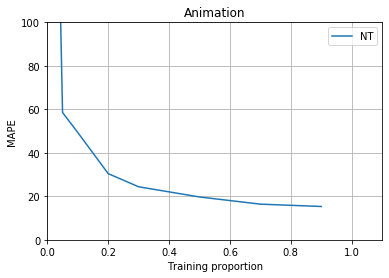

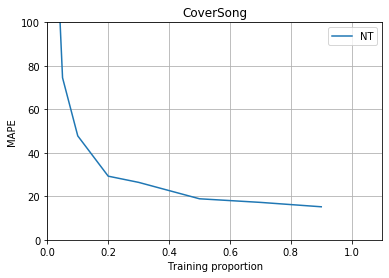

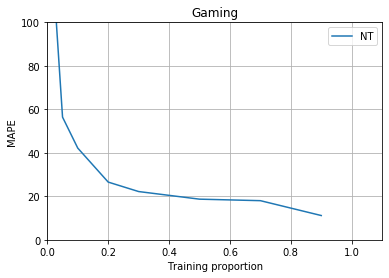

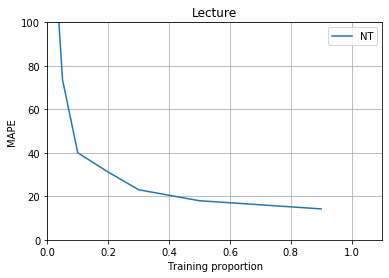

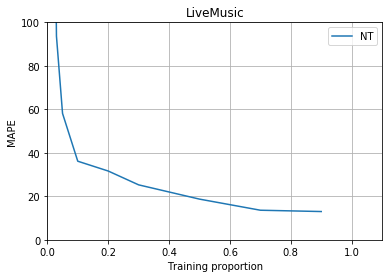

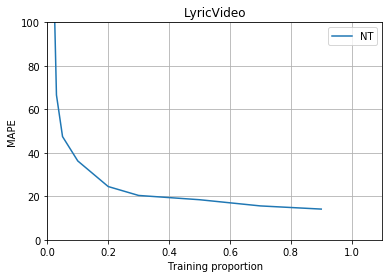

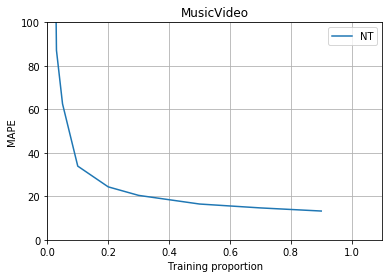

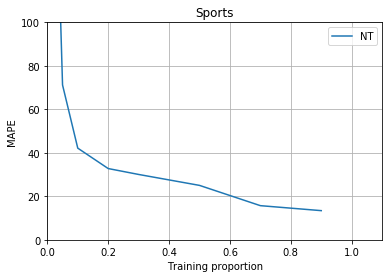

In [51]:
for inp in inputs:
    plt.plot(prop_conf_target, [res_nt[p, inp] for p in prop_conf_target], label = 'NT')
    plt.grid()
    plt.legend()
    plt.ylabel("MAPE")
    plt.ylim((0, 100))
    plt.xlim((0, 1.1))
    plt.xlabel("Training proportion")
    plt.title(inp)
    plt.savefig("../results/NT_"+inp+".png")
    plt.show()
    